<a href="https://colab.research.google.com/github/ecemyildizcan/SaniML/blob/main/saniml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Çalışmamızı google colab üzerinde yapacağımız için drive'a erişim istiyoruz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tüm veriyi işlenmeden önce 256*256 boyutunda yeniden şekillendiriyoruz.

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/test/dolu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/test/boş'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/train/dolu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/train/boş'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/validation/dolu'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [ ]:
import PIL
import os
from PIL import Image

f = '/content/drive/My Drive/mama-kabı/validation/boş'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

## Gerekli kütüphaneleri yüklüyoruz.

In [ ]:
import os
from keras import layers
from keras import models
import collections
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
import numpy as np
import math
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import randint
import glob
import gc
import pandas as pd
seed(1)

# Modelin eğitimi ve validasyonu sağlayabilmesi için erişmesi gereken dosyaların yolunu bir değişkene aktarıyoruz. 
## Sonrasında veri formatını kontrol ediyoruz.

In [ ]:
img_width, img_height = 256, 256
train_data_dir = '/content/drive/My Drive/mama-kabı/train'

validation_data_dir = '/content/drive/My Drive/mama-kabı/validation'

epochs = 100
batch_size = 4
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

## Keras tabanlı ikili sınıflandırma yapacağımız modeli yüklüyoruz.

In [ ]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) """görüntüyü birden çok görüntüye dönüştüren katman"""
model.add(Activation('relu')) """etkinleştirme işlevi"""
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) """convlving sonrası katman"""
model.add(Dense(64)) """fully-connected katmanı"""
model.add(Activation('relu')) 
model.add(Dropout(0.5)) """overfitting olmasını engellemek için kullanılır"""
model.add(Dense(1)) """çıktı katmanındaki görüntünün hangi kategoriye ait olduğuna karar veren yalnızca bir nöron içerir."""
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 


## DataGenarator kullanımı

In [ ]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255) 

import glob
leng=len(glob.glob(train_data_dir +'/*/*.JPG'))
lengval=len(glob.glob(validation_data_dir+'/*/*.JPG'))
  
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
 
hist=model.fit_generator( 
    train_generator, 
    steps_per_epoch=leng // batch_size, 
    epochs=300, 
    validation_data=validation_generator, 
    validation_steps=lengval // batch_size,
    ) 



Found 192 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/300
6/6 [==============================] - 3s 522ms/step - loss: 1.2593 - accuracy: 0.4583 - val_loss: 0.6737 - val_accuracy: 0.5789
Epoch 2/300
6/6 [==============================] - 3s 489ms/step - loss: 0.7291 - accuracy: 0.5417 - val_loss: 0.6393 - val_accuracy: 0.7368
Epoch 3/300
6/6 [==============================] - 3s 487ms/step - loss: 0.7028 - accuracy: 0.5833 - val_loss: 0.6189 - val_accuracy: 0.6447
Epoch 4/300
6/6 [==============================] - 3s 487ms/step - loss: 0.6723 - accuracy: 0.6667 - val_loss: 0.6534 - val_accuracy: 0.5921
Epoch 5/300
6/6 [==============================] - 3s 495ms/step - loss: 0.5805 - accuracy: 0.7917 - val_loss: 0.5523 - val_accuracy: 0.8553
Epoch 6/300
6/6 [==============================] - 3s 496ms/step - loss: 0.5343 - accuracy: 0.7917 - val_loss: 0.5910 - val_accuracy: 0.6447
Epoch 7/300
6/6 [==============================] - 3s 493ms/step - loss: 

## Eğitim sonucunu görselleşitiriyoruz.

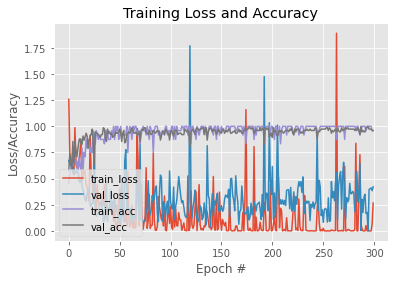

In [ ]:
N = 300
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

## Modeli kaydediyoruz.

In [ ]:
model.save("/content/drive/My Drive/mama-kabı/binary_100epoch_saved.h5") 

In [ ]:
from tensorflow.keras.models import load_model
model= load_model("/content/drive/My Drive/mama-kabı/binary_100epoch_saved.h5")


## Modeli test ediyoruz.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_width=256
img_height=img_width
test_data_dir = '/content/drive/My Drive/mama-kabı/test'
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
        test_data_dir,  # this is the target directory
        target_size=(img_width, img_height),  
        batch_size=1,
        class_mode='binary',shuffle=False) 
test_generator.reset()
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
scores = model.evaluate(test_generator,steps=STEP_SIZE_TEST) # testing images
print("Accuracy = ", scores[1])

Found 83 images belonging to 2 classes.
83/83 [==============================] - 2s 25ms/step - loss: 0.9474 - accuracy: 0.9398
Accuracy =  0.9397590160369873


In [ ]:
import cv2
import glob
import numpy as np
import os,fnmatch
import collections
imagesize=256
leng=len(glob.glob('/content/drive/My Drive/mama-kabı/test/*/*.JPG'))
xtest = np.ndarray(shape=(leng , imagesize, imagesize,3), dtype=np.uint8)
classes=np.ndarray(leng,dtype=np.uint8)

l=['dolu','boş']
index=0
for i in l:
  classDirectoryName='/content/drive/My Drive/mama-kabı/test/'+ i+'/*.JPG'
  for image in glob.glob(classDirectoryName):

    img =cv2.imread(image)
    img=img/255
    xtest[index]=cv2.resize(img, (imagesize, imagesize))

    if i=='boş':
      classes[index]=1
    else:
      classes[index]=0
   
    index +=1
print("0:dolu 1:boş  ---> ",collections.Counter(classes))

0:dolu 1:boş  --->  Counter({1: 53, 0: 30})


## Test sonuçlarını görselleştiriyoruz.

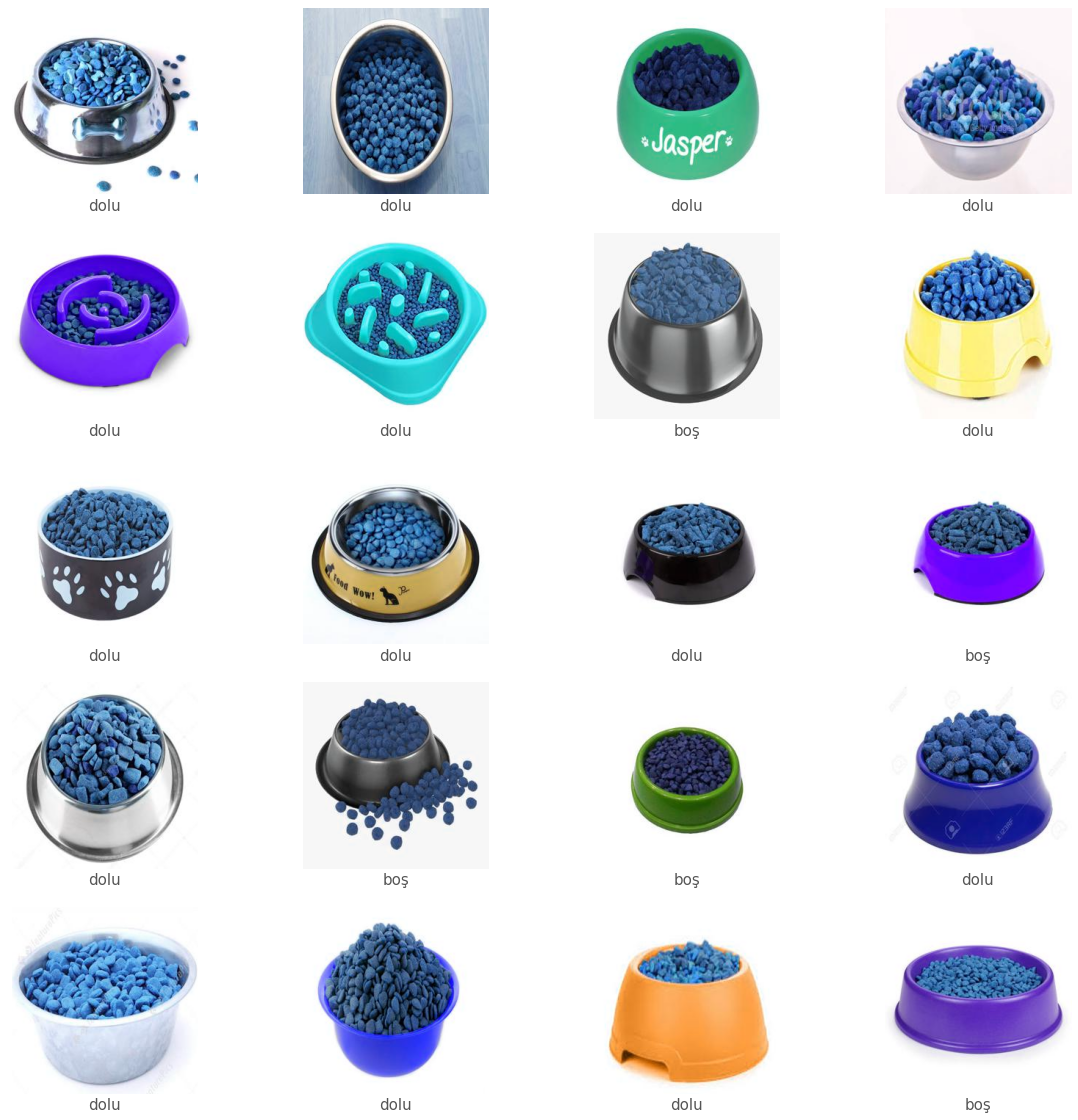

In [ ]:
import os
import glob
import numpy as np
import cv2

g=glob.glob('/content/drive/My Drive/mama-kabı/test/dolu/*.JPG')
index=0
imagesize=256
xdeneme= np.ndarray(shape=(len(g) , imagesize, imagesize,3), dtype=np.uint8)


for i in g[0:len(g)]:
  img =cv2.imread(i)
  xdeneme[index]=img
  index+=1

result=model.predict(xdeneme)
result=["dolu" if i==1 else "boş" for i in result ]

fig, axis = plt.subplots(5, 4, figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, ax in enumerate(axis.flat):   
    ax.set_xticks([])
    ax.set_yticks([])
k=0
for i in range(0,4):
  for j in range(0,5):
      axis[j, i].imshow(xdeneme[k], cmap=plt.get_cmap("gray"))
      axis[j, i].set_xlabel(result[k], fontsize=15)
      k+=1
    

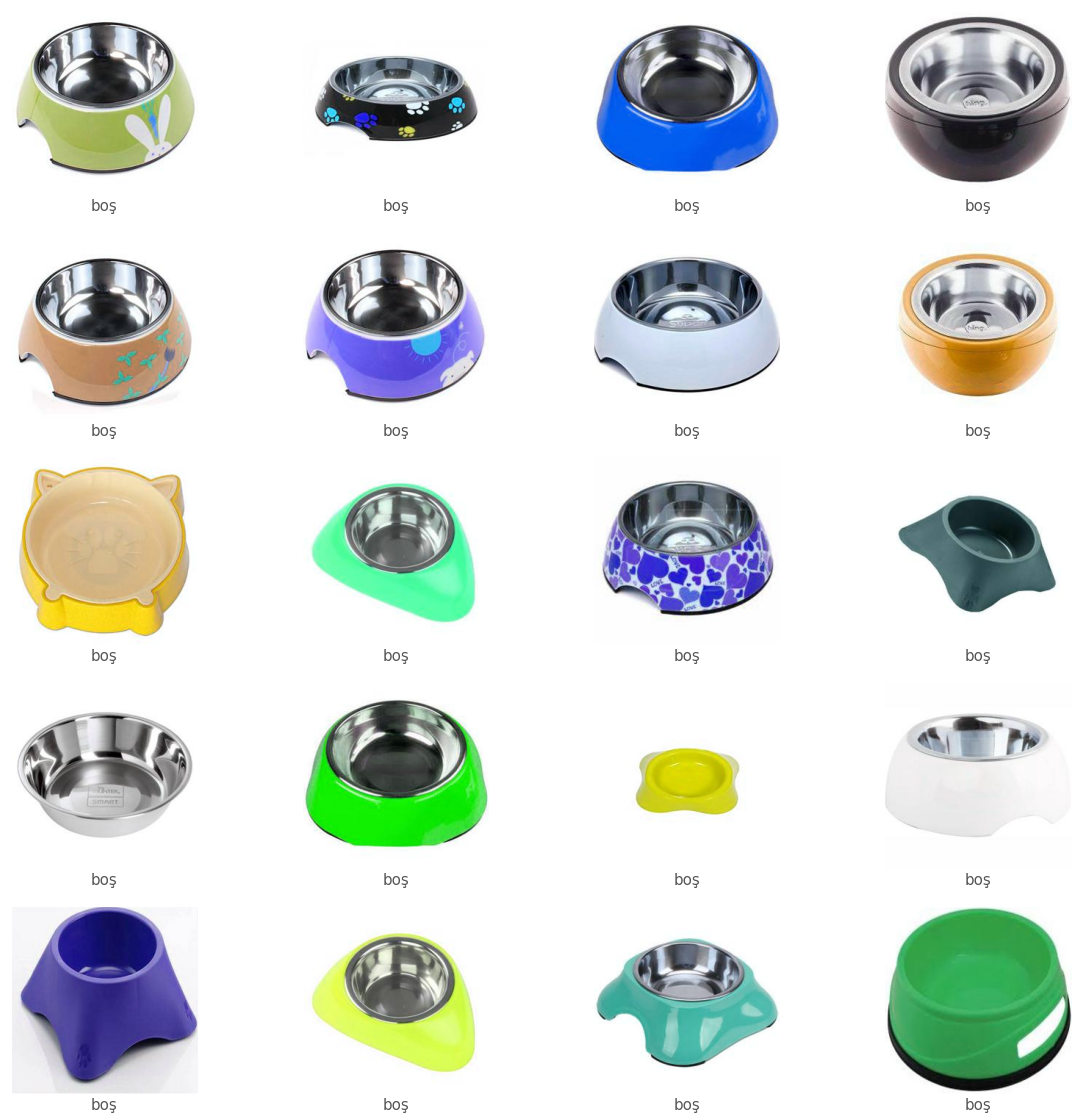

In [ ]:
import os
import glob
import numpy as np
import cv2

g=glob.glob('/content/drive/My Drive/mama-kabı/test/boş/*.JPG')
index=0
imagesize=256
xdeneme= np.ndarray(shape=(len(g) , imagesize, imagesize,3), dtype=np.uint8)


for i in g[0:len(g)]:
  img =cv2.imread(i)
  xdeneme[index]=img
  index+=1

result=model.predict(xdeneme)
result=["dolu" if i==1 else "boş" for i in result ]

fig, axis = plt.subplots(5, 4, figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, ax in enumerate(axis.flat):   
    ax.set_xticks([])
    ax.set_yticks([])
k=0
for i in range(0,4):
  for j in range(0,5):
      axis[j, i].imshow(xdeneme[k], cmap=plt.get_cmap("gray"))
      axis[j, i].set_xlabel(result[k], fontsize=15)
      k+=1
    